<a href="https://colab.research.google.com/github/Stedu-PhucNguyen/MachineLearning_final/blob/main/Exercise02_521H0510_521H0499.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Member**:
521H0510 - Nguyễn Hoàng Phúc

521H0499 - Nguyễn Lam Duy

# **Importing Libraries and Dataset**

This section is responsible for importing the necessary Python libraries and loading the dataset 'AmesHousing.csv'. Key libraries include pandas for data manipulation, matplotlib and seaborn for visualization, and scikit-learn for machine learning functionalities. The dataset is loaded into a pandas DataFrame named 'data'.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load dataset
data = pd.read_csv('AmesHousing.csv', delimiter=',')  # Adjust delimiter if needed
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

# **Statistical Analysis and Data Visualization**

- ***Basic Statistics:*** Descriptive statistics for the dataset are displayed using the describe() function.
- ***Histograms and Bar Plots:*** Numerical features are visualized through histograms, and categorical features are visualized through bar plots. This provides an overview of the distribution of data within each feature.
- ***Class Distribution:*** The distribution of the target variable 'SalePrice' is visualized using a histogram.
- ***Correlation Matrix:*** A heatmap of the correlation matrix is created to visualize the relationships between numerical features.

In [ ]:
# Basic statistics
print(data.describe())

In [ ]:
# Histograms for numerical features
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_features = num_cols[4:-1]  # Assuming starting from the 5th column

# Set up subplots for numerical features
fig, axes = plt.subplots(nrows=len(num_features), ncols=1, figsize=(8, 4 * len(num_features)))
for i, column in enumerate(num_features):
    sns.histplot(data[column], bins=15, kde=True, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Bar plots for categorical features
cat_cols = data.select_dtypes(include=['object']).columns

# Set up subplots for categorical features
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 4 * len(cat_cols)))
for i, column in enumerate(cat_cols):
    sns.countplot(x=column, data=data, ax=axes[i], order=data[column].value_counts().index)
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Class distribution (Sale Condition)
sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(data["SalePrice"], kde=True)

In [ ]:
data['SalePrice'].describe()

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

# **Data Processing**

- ***Scatter Plot Analysis:*** A scatter plot of 'Gr Liv Area' against 'SalePrice' is analyzed, and outliers are identified based on specific conditions.
- ***Handling Outliers:*** Outliers are dropped from the dataset based on their index values.
- ***Handling Missing Data:*** Percentage of missing data for each column is calculated and visualized using a bar plot. Missing values in specific columns are handled by various strategies like dropping rows, filling with zeros, or imputing with the mean or most frequent values.
- ***Feature Engineering:*** The 'Lot Frontage' feature is imputed with the mean value within each neighborhood. Categorical columns are converted into dummy variables for modeling purposes.
- ***Train-Test Split:*** The data is split into training and testing sets for model evaluation.

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

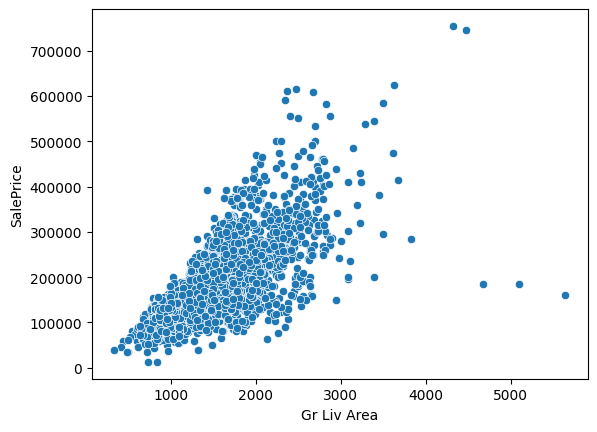

In [ ]:
# Scatter plot Living Area and Sales Price
sns.scatterplot(data=data, x='Gr Liv Area',y='SalePrice')

In [ ]:
data[(data['Gr Liv Area']>4000) & (data['SalePrice']<400000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [ ]:
#drop the outliers based on index values
data = data.drop(index=[1498,2180,2181],axis=0)
#remove PID as we already have index
data = data.drop("PID",axis=1)
len(data.columns)

81

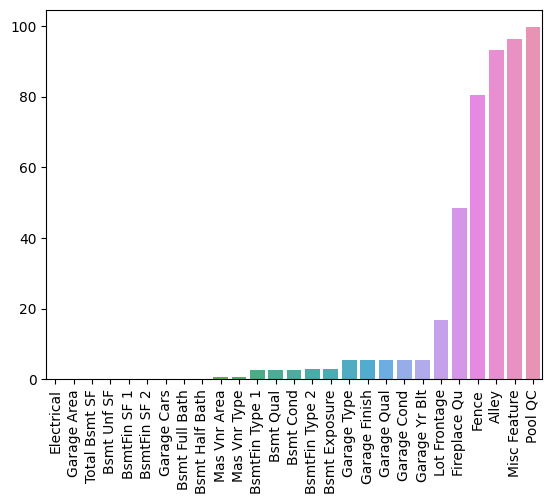

In [ ]:
# Percentage of missing data for each row in dataset
def percent_missing(data):
    # calculates percentage
    percent_nan = 100 * data.isnull().sum() / len(data)
    # filter greater than 0 and sort data
    percent_nan = percent_nan[percent_nan > 0].sort_values()

    return percent_nan

percent_nan = percent_missing(data)
percent_nan
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

<ipython-input-7-4a339f6e9102>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[bsmt_num_cols] = data[bsmt_num_cols].fillna(0)


(0.0, 1.0)

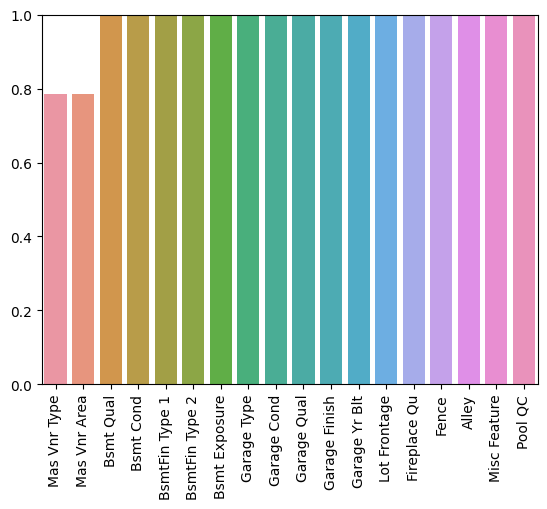

In [ ]:
# Dropping missing data rows for electrical and garage area
data = data.dropna(axis=0,subset=['Electrical','Garage Area'])

bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
data[bsmt_num_cols] = data[bsmt_num_cols].fillna(0)
percent_nan = percent_missing(data)
# Plot the percentage in a barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

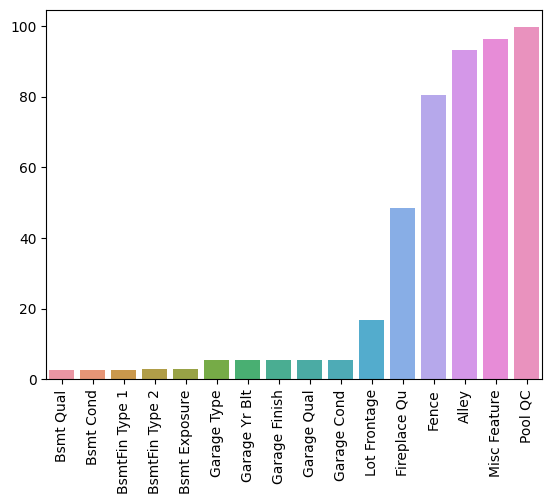

In [ ]:
data['Mas Vnr Type'] = data['Mas Vnr Type'].fillna('None')
data['Mas Vnr Area'] = data['Mas Vnr Area'].fillna(0)
percent_nan = percent_missing(data)
# Plot the percentage in a barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Bsmt Qual'),
  Text(1, 0, 'Bsmt Cond'),
  Text(2, 0, 'BsmtFin Type 1'),
  Text(3, 0, 'BsmtFin Type 2'),
  Text(4, 0, 'Bsmt Exposure'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

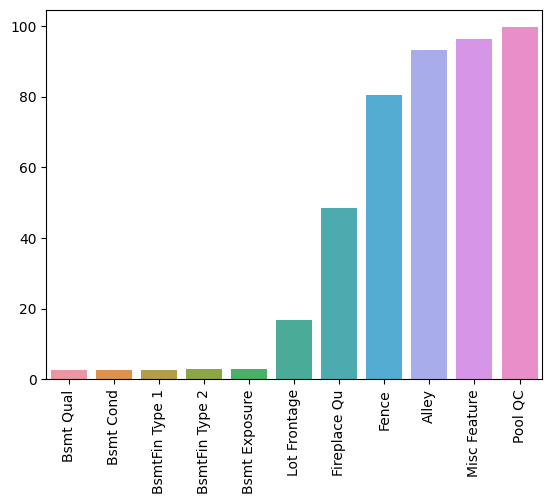

In [ ]:
gar_str_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
data[gar_str_cols] = data[gar_str_cols].fillna('None')
data['Garage Yr Blt'] = data['Garage Yr Blt'].fillna(0)
percent_nan = percent_missing(data)
# Plot the percentage in a barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [ ]:
data = data.drop(['Fence','Alley','Misc Feature','Pool QC'],axis=1)

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

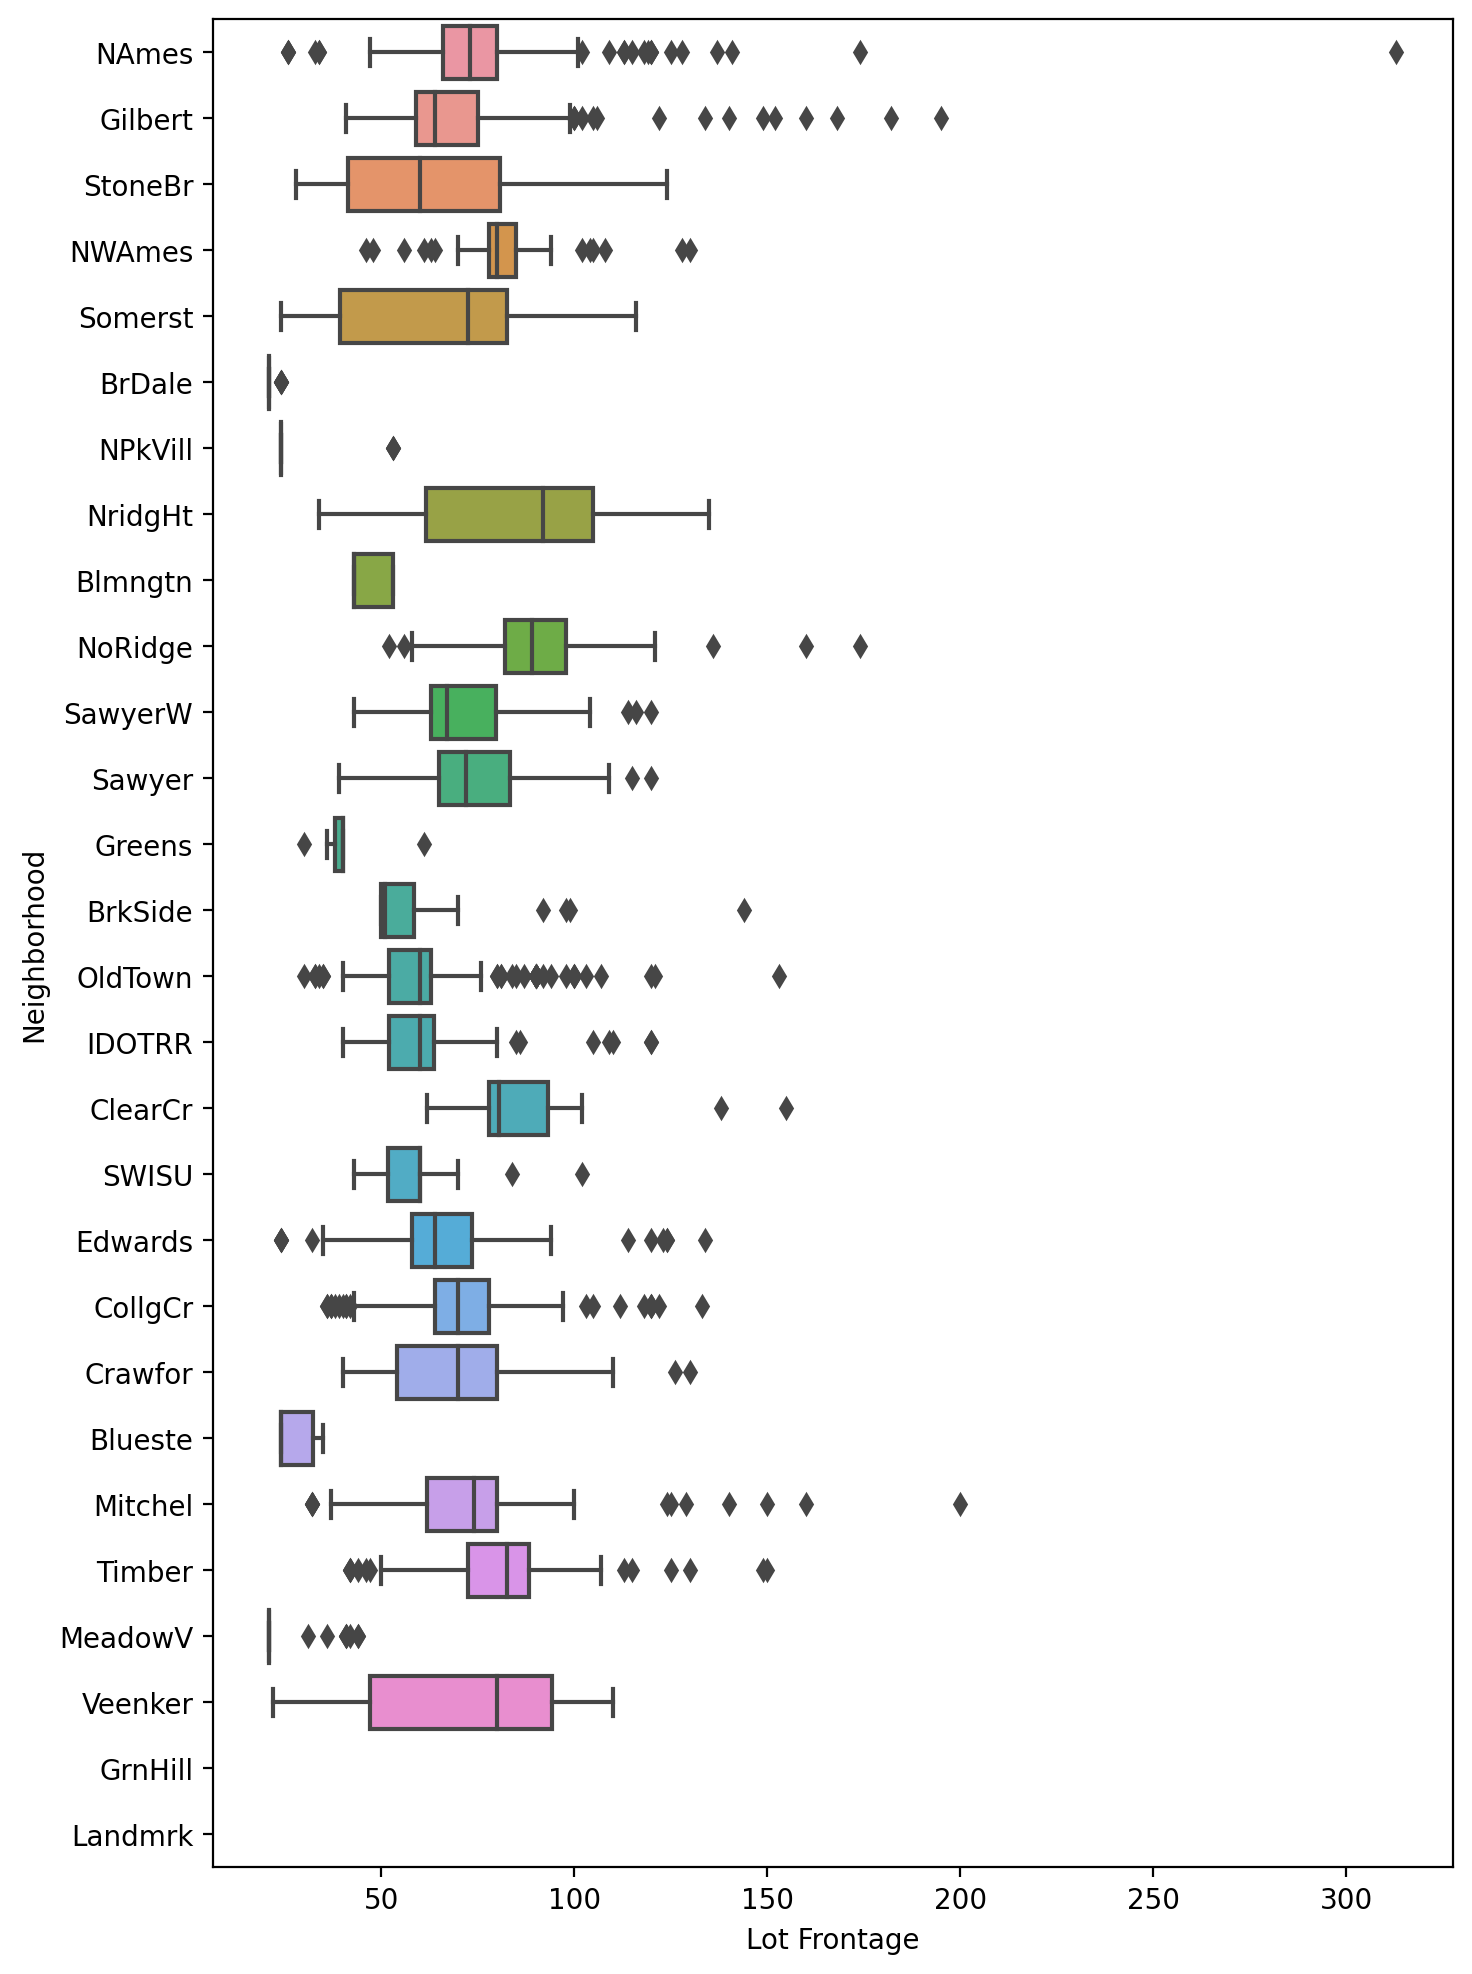

In [ ]:
data['Fireplace Qu'] = data['Fireplace Qu'].fillna('None')
plt.figure(figsize=(8,12),dpi=200) # To make the plot a bit taller for better visualisation
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=data,orient='h')

In [ ]:
data['Lot Frontage'] = data.groupby('Neighborhood')['Lot Frontage']\
                    .transform(lambda value: value.fillna(value.mean()))
data['Lot Frontage'] = data['Lot Frontage'].fillna(0)
data['MS SubClass'] = data['MS SubClass'].apply(str)
# Return all columns with String
object_df = data.select_dtypes(include='object')
# Return all columns with Numerical Values
numeric_df = data.select_dtypes(exclude='object')
# Replace with dummy variables
df_objects_dummies = pd.get_dummies(object_df,drop_first=True)
# Concatenate the object with string to complete the dataframe
data = pd.concat([numeric_df,df_objects_dummies], axis=1)

In [ ]:
# Split the data into training and testing sets
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# # Create a preprocessor to handle both numerical and categorical features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a preprocessor to handle both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing steps to the training and test sets
# X_train_preprocessed = preprocessor.fit_transform(X_train)
# X_test_preprocessed = preprocessor.transform(X_test)

# **Basic Machine Learning Models**

- ***Preprocessing:*** Categorical and numerical features are identified, and preprocessing transformers are defined for each type of feature.
- ***Model Pipelines:*** Pipeline structures are created for Linear Regression, Decision Tree, Random Forest, Support Vector Machine (SVR), and Gradient Boosting models. Each pipeline includes a preprocessor and a regressor.
- ***Model Training and Evaluation:*** Each model is trained on the training set, predictions are made on the test set, and mean squared error (MSE) is calculated and printed for evaluation.

In [ ]:
# Create pipelines for each model with regularization
alpha_value = 0.1  # Adjust alpha as needed for regularization

lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', LinearRegression())])

dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', DecisionTreeRegressor(ccp_alpha=0.01))])  # Decision Tree with cost-complexity pruning

rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, ccp_alpha=0.01))])  # Random Forest with cost-complexity pruning

svm_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', SVR(C=1.0))])  # Support Vector Machine with regularization parameter C

gb_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, min_samples_leaf=1))])  # Gradient Boosting with tree depth control


In [ ]:
# Train and evaluate models
models = [lr_model, dt_model, rf_model, svm_model, gb_model]
mean_squared_errors = {}
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    model_name = model.named_steps['regressor'].__class__.__name__
    mean_squared_errors[model_name] = mse  # Store MSE for each model
    print(f"{model_name} - Mean Squared Error: {mse}")

LinearRegression - Mean Squared Error: 851624383.8840477
DecisionTreeRegressor - Mean Squared Error: 1388191446.504701
RandomForestRegressor - Mean Squared Error: 545780037.6412138
SVR - Mean Squared Error: 7618414443.010986
GradientBoostingRegressor - Mean Squared Error: 406170785.0797297


# **Advanced Neural Network Models RNN**

- ***Preprocessing for RNN:*** The preprocessor is applied to the training data, and the data is transformed into sequences suitable for an RNN model.
- ***Building the RNN Model:*** A Sequential model with SimpleRNN layers is constructed for regression.
- ***Training the RNN Model:*** The RNN model is trained on the transformed training data.
- ***Evaluation:*** The trained RNN model is evaluated on the test set, and MSE is calculated and printed.

In [ ]:
# Fit and transform the preprocessor on the training data
X_train_preprocessed_rnn = preprocessor.fit_transform(X_train)

# Convert sparse matrix to dense array
# X_train_dense = X_train_preprocessed.toarray()

# Assume a sequence length of 10 for the time series data
sequence_length_rnn = 15

# Create sequences of data for RNN
X_train_rnn = np.array([X_train_preprocessed_rnn[i:i + sequence_length_rnn] for i in range(len(X_train_preprocessed_rnn) - sequence_length_rnn)])
y_train_rnn = y_train.values[sequence_length_rnn:]

# Reshape data for RNN input
X_train_rnn = X_train_rnn.reshape(X_train_rnn.shape[0], X_train_rnn.shape[1], X_train_rnn.shape[2])

# Build the RNN model
model_rnn = Sequential()

# model_rnn.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
# model_rnn.add(Dense(units=1, activation='linear'))
# Add the first SimpleRNN layer with 50 units and 'relu' activation
model_rnn.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True))

# Add additional SimpleRNN layers (you can customize the number of units and activation functions)
model_rnn.add(SimpleRNN(units=50, activation='relu', return_sequences=True))
model_rnn.add(SimpleRNN(units=50, activation='relu', return_sequences=True))
model_rnn.add(SimpleRNN(units=50, activation='relu', return_sequences=True))
model_rnn.add(SimpleRNN(units=50, activation='relu', return_sequences=True))

# Add the final SimpleRNN layer with 50 units and 'relu' activation
model_rnn.add(SimpleRNN(units=50, activation='relu'))

# Add a Dense layer with 1 unit for regression and 'linear' activation
model_rnn.add(Dense(units=1, activation='linear'))

model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the RNN model
model_rnn.fit(
    X_train_rnn,
    y_train_rnn,
    epochs=100,
    batch_size=32,
    validation_split=0.2
    )

Epoch 1/100
59/59 [==============================] - 10s 45ms/step - loss: 21448704000.0000 - val_loss: 9195185152.0000
Epoch 2/100
59/59 [==============================] - 2s 28ms/step - loss: 7249358848.0000 - val_loss: 9548910592.0000
Epoch 3/100
59/59 [==============================] - 2s 27ms/step - loss: 6777342464.0000 - val_loss: 8883643392.0000
Epoch 4/100
59/59 [==============================] - 2s 27ms/step - loss: 6294760960.0000 - val_loss: 8972356608.0000
Epoch 5/100
59/59 [==============================] - 2s 27ms/step - loss: 6198427648.0000 - val_loss: 8121155072.0000
Epoch 6/100
59/59 [==============================] - 2s 28ms/step - loss: 6059596288.0000 - val_loss: 8421335040.0000
Epoch 7/100
59/59 [==============================] - 4s 66ms/step - loss: 6318418944.0000 - val_loss: 7965379072.0000
Epoch 8/100
59/59 [==============================] - 4s 62ms/step - loss: 6030643200.0000 - val_loss: 7948804608.0000
Epoch 9/100
59/59 [==============================] - 4

In [ ]:
# Preprocess the test data using the same preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

# Convert sparse matrix to dense array
# X_test_dense = X_test_preprocessed.toarray()

# Create sequences of data for RNN
X_test_rnn = np.array([X_test_preprocessed[i:i + sequence_length_rnn] for i in range(len(X_test_preprocessed) - sequence_length_rnn)])
y_test_rnn = y_test.values[sequence_length_rnn:]

# Reshape data for RNN input
X_test_rnn = X_test_rnn.reshape(X_test_rnn.shape[0], X_test_rnn.shape[1], X_test_rnn.shape[2])

# Evaluate the RNN model on the test data
y_pred_rnn = model_rnn.predict(X_test_rnn)
mse_rnn = mean_squared_error(y_test_rnn, y_pred_rnn)

print(f"RNN - Mean Squared Error on Test Data: {mse_rnn}")

18/18 [==============================] - 1s 11ms/step
RNN - Mean Squared Error on Test Data: 12172365097.653473


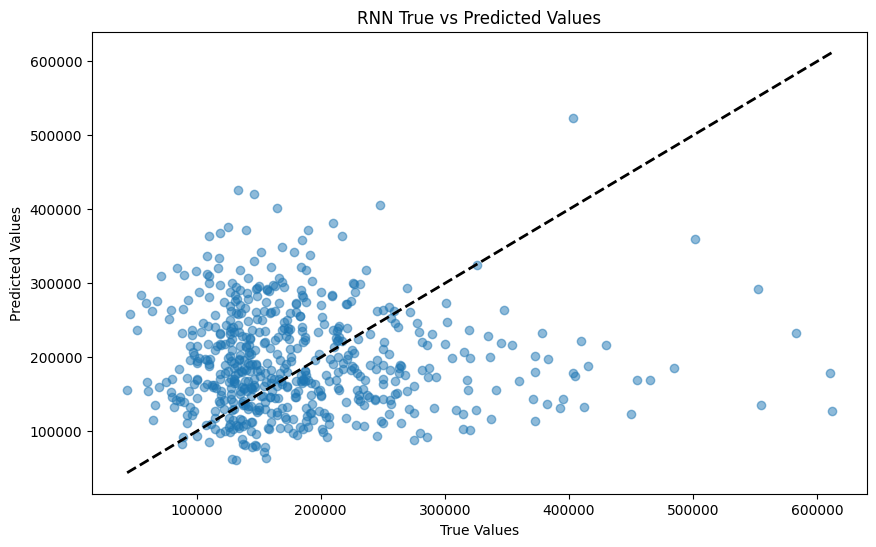

In [ ]:
# Plot true vs predicted values for RNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rnn, y_pred_rnn, alpha=0.5)
plt.plot([min(y_test_rnn), max(y_test_rnn)], [min(y_test_rnn), max(y_test_rnn)], 'k--', lw=2)  # Diagonal line for reference
plt.title('RNN True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# **Advanced Neural Network Models FFNN**

- ***Preprocessing for FFNN:*** The preprocessor is applied to the training data.
- ***Building the FFNN Model:*** A Sequential model with Dense layers and dropout is constructed for regression.
- ***Training the FFNN Model:*** The FFNN model is trained on the training set with early stopping to prevent overfitting.
- ***Evaluation:*** The trained FFNN model is evaluated on the test set, and MSE is calculated and printed. Scatter plot visualization is provided for true vs predicted values.

In [ ]:
# Apply the preprocessor to the training data
X_train_preprocessed_ffnn = preprocessor.fit_transform(X_train)

In [ ]:
# Build the FFNN model with adjustments
model_ffnn = Sequential()
model_ffnn.add(Dense(128, activation='relu', input_shape=(X_train_preprocessed_ffnn.shape[1],)))
model_ffnn.add(Dropout(0.5))
model_ffnn.add(Dense(64, activation='relu'))
model_ffnn.add(Dropout(0.5))
model_ffnn.add(Dense(32, activation='relu'))
model_ffnn.add(Dropout(0.5))
model_ffnn.add(Dense(1, activation='linear'))  # Assuming regression, so using linear activation

model_ffnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Convert the sparse matrix to a dense NumPy array for training and validation
# X_train_dense = X_train_preprocessed.toarray()

# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_preprocessed_ffnn, y_train, test_size=0.2, random_state=42
)

# Train the FFNN with the training set and validate on the validation set
model_ffnn.fit(
    X_train_split,
    y_train_split,
    epochs=100,
    validation_data=(X_val_split, y_val_split),
    callbacks=[early_stopping],
)

Epoch 1/100
59/59 [==============================] - 2s 7ms/step - loss: 38582935552.0000 - mean_squared_error: 38582935552.0000 - val_loss: 39108792320.0000 - val_mean_squared_error: 39108792320.0000
Epoch 2/100
59/59 [==============================] - 0s 3ms/step - loss: 38488047616.0000 - mean_squared_error: 38488047616.0000 - val_loss: 38811320320.0000 - val_mean_squared_error: 38811320320.0000
Epoch 3/100
59/59 [==============================] - 0s 3ms/step - loss: 37588348928.0000 - mean_squared_error: 37588348928.0000 - val_loss: 36733251584.0000 - val_mean_squared_error: 36733251584.0000
Epoch 4/100
59/59 [==============================] - 0s 3ms/step - loss: 33701689344.0000 - mean_squared_error: 33701689344.0000 - val_loss: 29854824448.0000 - val_mean_squared_error: 29854824448.0000
Epoch 5/100
59/59 [==============================] - 0s 4ms/step - loss: 24725628928.0000 - mean_squared_error: 24725628928.0000 - val_loss: 17727326208.0000 - val_mean_squared_error: 17727326208.

In [ ]:
# Evaluate the FFNN
X_test_preprocessed = preprocessor.transform(X_test)
y_pred_ffnn = model_ffnn.predict(X_test_preprocessed)
mse_ffnn = mean_squared_error(y_test, y_pred_ffnn)
print(f"FFNN - Mean Squared Error: {mse_ffnn}")

19/19 [==============================] - 0s 2ms/step
FFNN - Mean Squared Error: 990668157.1425948


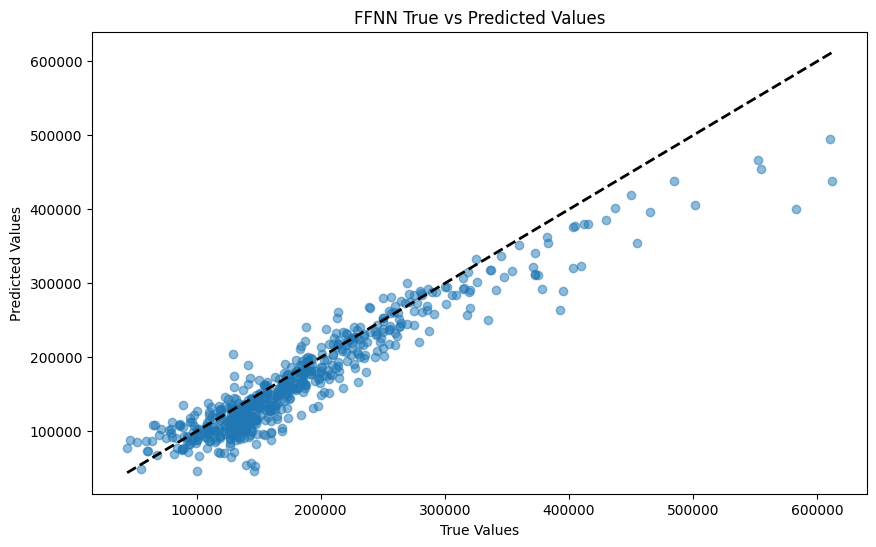

In [ ]:
# Plot true vs predicted values for FFNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ffnn, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Diagonal line for reference
plt.title('FFNN True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# **Improving Model Accuracy**

**1. Analyze Wrong Predictions**
- Evaluate the residuals (the differences between predicted and actual values) for each model. Analyze cases with large residuals.
- Visualize the residuals using scatter plots to identify patterns or outliers.

**2. Propose Solutions**
- Feature Engineering: Create new features that capture patterns in the data that the model might be missing.
- Outlier Handling: Examine and handle outliers in the data that might be affecting model performance.
- Model Tuning: Experiment with hyperparameter tuning for each model.
- Ensemble Methods: Combine predictions from multiple models to improve overall performance.
- Data Transformation: Apply transformations to features or the target variable to improve model fit.
- Address Non-linearity: Explore non-linear models or polynomial features if the relationships in the data are non-linear.

**3. Implement Solutions**
- Based on the proposed solutions, make changes to the code and retrain the models.
- Implement any necessary data preprocessing or feature engineering steps.

**4. Evaluate Improvement**
- After implementing changes, reevaluate the models using metrics such as mean squared error (MSE), R-squared, or other relevant regression metrics.
- Compare the new results to the baseline metrics to assess whether the changes led to improvement.

**5. Choose suitable dataset for the model**
- In order to improve model accuracy, the chosen dataset has to be suitable for the corresponding model. The dataset should align with the characteristics and requirements of the model architecture. For example, the dataset we used for this exercise is not suitable for RNN, hence when compute MSE return a large value.

In [ ]:
param_dist = {
    'regressor__n_estimators': [100, 150, 200, 250],
    'regressor__max_depth': [None, 5, 10, 15],
    'regressor__min_samples_split': [2, 3, 5, 7],
    'regressor__min_samples_leaf': [1, 2, 3, 4],
    'regressor__ccp_alpha': [0.0, 0.005, 0.01, 0.02]
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5)
random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_
print(f"Best Hyperparameters: {best_params_random}")

best_rf_model_random = random_search.best_estimator_
y_pred_tuned_random = best_rf_model_random.predict(X_test)
mse_tuned_random = mean_squared_error(y_test, y_pred_tuned_random)

print(f"Tuned Random Forest (Randomized Search) - Mean Squared Error: {mse_tuned_random}")

Best Hyperparameters: {'regressor__n_estimators': 250, 'regressor__min_samples_split': 3, 'regressor__min_samples_leaf': 1, 'regressor__max_depth': 10, 'regressor__ccp_alpha': 0.005}
Tuned Random Forest (Randomized Search) - Mean Squared Error: 539366059.1802403
